In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()
df_test = pd.read_csv("test.csv")
df_train.tail(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


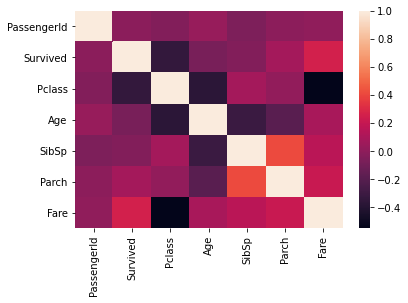

In [3]:
# Indicates the correlations between numerical columns
train_corr = df_train.corr()
sns.heatmap(train_corr)
plt.show()
# we may create a new feature from Sibsp and parch

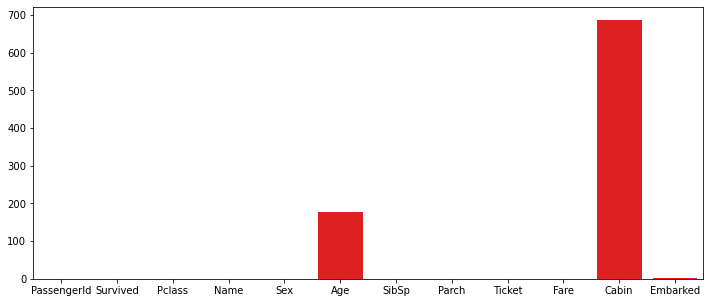

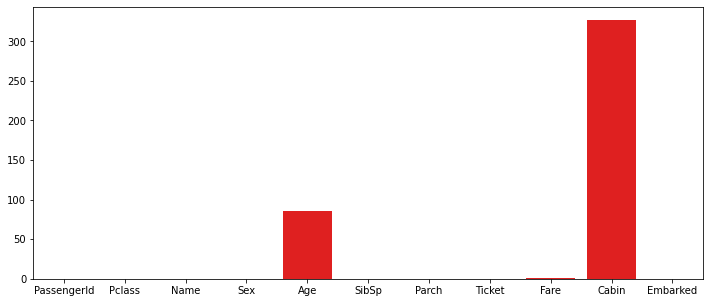

In [4]:
# Missing values in train and test datasets
plt.figure(figsize = (12, 5))
sns.barplot(df_train.columns, df_train.isna().sum().values, color = "red")
plt.show()

plt.figure(figsize = (12, 5))
sns.barplot(df_test.columns, df_test.isna().sum().values, color = "red")
plt.show()

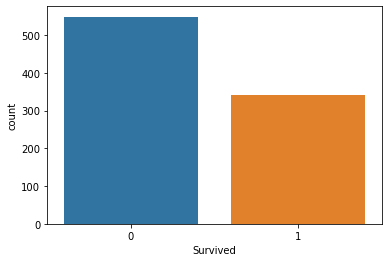

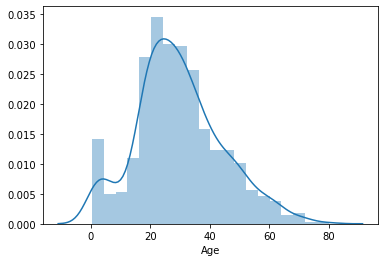

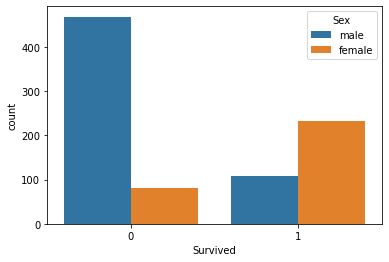

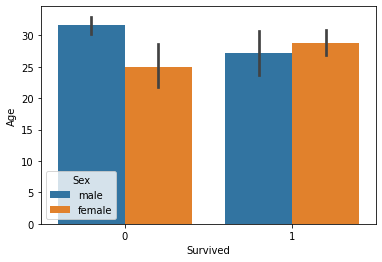

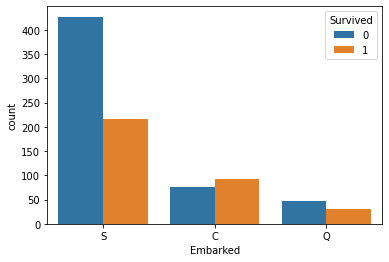

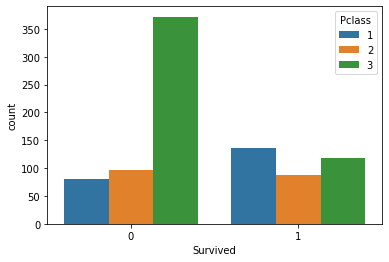

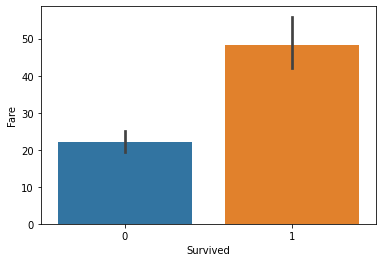

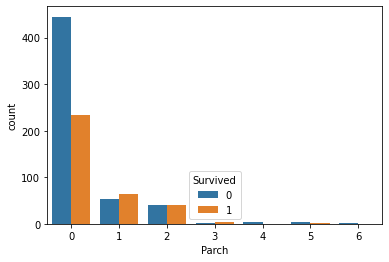

In [5]:
# Exploratory Data Analysis
sns.countplot(df_train["Survived"])
plt.show()

sns.distplot(df_train["Age"])
plt.show()

sns.countplot(x = "Survived", hue = "Sex", data = df_train)
plt.show()


sns.barplot( x = "Survived", y = "Age", hue = "Sex", data = df_train)
plt.show()

sns.countplot( x = "Embarked", hue = "Survived", data = df_train)
plt.show()

sns.countplot( x = "Survived", hue = "Pclass", data = df_train)
plt.show()

sns.barplot(x = "Survived", y=  "Fare", data = df_train)
plt.show()

sns.countplot(x = "Parch", hue = "Survived", data = df_train)
plt.show()

In [6]:
#Preprocessing data

train_features = df_train.copy()
test_features = df_test.copy()

#dealing with missing data  (drop cabin column)
train_features.drop("Cabin", axis = 1, inplace = True)
test_features.drop("Cabin", axis = 1, inplace = True)

# impute mean value for the columns Age and Fare
train_features.Age.fillna(train_features.Age.mean(), inplace = True)
train_features.Fare.fillna(train_features.Fare.mean(), inplace = True)
test_features.Age.fillna(test_features.Age.mean(), inplace = True)
test_features.Fare.fillna(test_features.Fare.mean(), inplace = True)

#impute with the most common class for "Embarked" column
train_features.Embarked.fillna("S", inplace = True)
test_features.Embarked.fillna("S", inplace = True)

#label encoding
train_features["Embarked"] = train_features["Embarked"].map({"C":1,  "S": 2,  "Q":3})
train_features["Sex"] = train_features["Sex"].map({"male" :0,  "female": 1})
test_features["Embarked"] = test_features["Embarked"].map({"C":1,  "S": 2,  "Q":3})
test_features["Sex"] = test_features["Sex"].map({"male" :0,  "female": 1})


#Feature Extraction (SibSp& Parch columns are highly correlated, we make just one feature by merging them)
train_features["Alone"] = train_features["SibSp"] + train_features["Parch"]
train_features["Alone"] = train_features["Alone"].apply(lambda x : 1 if x==0 else 0) 
#if any row in the alone column is zero, then alone status is 1; else  it is zero.
train_features.drop(["SibSp", "Parch"], axis = 1, inplace = True)
test_features["Alone"] = test_features["SibSp"] + test_features["Parch"]
test_features["Alone"] = test_features["Alone"].apply(lambda x : 1 if x==0 else 0) 
#if any row in the alone column is zero, then alone status is 1; else  it is zero.
test_features.drop(["SibSp", "Parch"], axis = 1, inplace = True)
#Feature Engineering: we create a new feature from names column
train_features["Title"] = train_features["Name"].str.extract("([A-Za-z]+)\.", expand = False)
train_features.drop("Name", axis = 1,  inplace = True)
test_features["Title"] = test_features["Name"].str.extract("([A-Za-z]+)\.", expand = False)
test_features.drop("Name", axis = 1,  inplace = True)

train_features.drop("PassengerId", axis = 1,  inplace = True)
train_features.drop("Ticket", axis = 1,  inplace = True)
test_features.drop("PassengerId", axis = 1,  inplace = True)
test_features.drop("Ticket", axis = 1,  inplace = True)


least_occuring = ["Dr", "Rev", "Col", "Major", "Mlle", "Lady", "Sir", "Don", "Jonkheer", "Mme", "Capt", "Ms", "Countess"]
train_features["Title"] = train_features["Title"].replace(least_occuring, "Rare")
test_features["Title"] = test_features["Title"].replace(least_occuring, "Rare")

train_features["Title"] = train_features["Title"].map({ "Mr" : 5,  "Miss": 4, "Mrs" :3 , "Master" :2 ,  "Rare" : 1})
test_features["Title"] = test_features["Title"].map({ "Mr" : 5,  "Miss": 4, "Mrs" :3 , "Master" :2 ,  "Rare" : 1})


train_label = train_features.pop("Survived")
test_features.Title.fillna("5", inplace = True)

#binning age column

train_features.loc[train_features["Age"] <= 20, "Age" ] = 1
train_features.loc[(train_features["Age"] > 20 ) & (train_features["Age"] <=40 ),  "Age" ] = 2
train_features.loc[(train_features["Age"] > 40 ) & (train_features["Age"] <=60 ),  "Age" ] = 3
train_features.loc[train_features["Age"] >=  60, "Age" ] = 4
                                                    

test_features.loc[test_features["Age"] <= 20, "Age" ] = 1
test_features.loc[(test_features["Age"] > 20) & (test_features["Age"] <=40 ),  "Age" ] = 2
test_features.loc[(test_features["Age"] > 40 ) & (test_features["Age"] <=60 ),  "Age" ] = 3
test_features.loc[test_features["Age"] >=  60, "Age" ] = 4

                                                        


X = train_features
y = train_label

X
                            

,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,3,0,2.0,7.2500,2,0,5
1,1,1,2.0,71.2833,1,0,3
2,3,1,2.0,7.9250,2,1,4
3,1,1,2.0,53.1000,2,0,3
4,3,0,2.0,8.0500,2,1,5
...,...,...,...,...,...,...,...
886,2,0,2.0,13.0000,2,1,1
887,1,1,1.0,30.0000,2,1,4
888,3,1,2.0,23.4500,2,0,4
889,1,0,2.0,30.0000,1,1,5


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict 
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix




kf = StratifiedKFold(n_splits=10,  random_state=1, shuffle=True)

acc_scores_f1 = []
acc_scores_f1_train = []
acc_scores = []
acc_scores_train = []
for train_index, test_index in kf.split(X, y): 
    
  #  print("Training data index: ", train_index) 
  #  print("Test data index: ", test_index) 
 
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index ], y.iloc[train_index], y.iloc[test_index]
    
    over_sample = RandomOverSampler(sampling_strategy = "minority")
    X_tover, y_tover = over_sample.fit_sample(X_train.values,y_train.values)
    #print(X_test.isnull().values.any())
    
    model = RandomForestClassifier(n_estimators = 100, max_depth = 12, max_leaf_nodes = 10,  random_state = 1)
    model.fit(X_tover, y_tover)

    preds = model.predict(X_test)
    acc_scores_f1.append(metrics.f1_score(y_test,preds, average = None))
    acc_scores.append(metrics.accuracy_score(y_test,preds))
    acc_scores_f1_train.append(metrics.f1_score(y_tover, model.predict(X_tover), average = None))
    acc_scores_train.append(metrics.accuracy_score(y_tover, model.predict(X_tover)))
    
    print("Confusion matrix for kth fold :", confusion_matrix(y_test, preds))


print("F1_score: (test)", np.mean(acc_scores_f1))

print("F1_score: (train)", np.mean(acc_scores_f1_train))


print("Acc_score: (test)", np.mean(acc_scores))

print("Acc_score: (train)", np.mean(acc_scores_train))
    

Confusion matrix for kth fold : [[46  9]
 [11 24]]
Confusion matrix for kth fold : [[48  7]
 [ 8 26]]
Confusion matrix for kth fold : [[45 10]
 [11 23]]
Confusion matrix for kth fold : [[48  7]
 [ 4 30]]
Confusion matrix for kth fold : [[44 11]
 [ 9 25]]
Confusion matrix for kth fold : [[50  5]
 [ 9 25]]
Confusion matrix for kth fold : [[41 14]
 [ 9 25]]
Confusion matrix for kth fold : [[46  9]
 [ 7 27]]
Confusion matrix for kth fold : [[50  5]
 [ 7 27]]
Confusion matrix for kth fold : [[47  7]
 [ 9 26]]
F1_score: (test) 0.8007468986001601
F1_score: (train) 0.8138997805229137
Acc_score: (test) 0.8114856429463171
Acc_score: (train) 0.8143082648345805


In [8]:
predictions = model.predict(test_features)


In [9]:
submit = pd.DataFrame({"PassengerId": df_test.PassengerId, "Survived" : predictions})
submit.to_csv("kaggle_submission.csv", index = False )
print("Your submission was successfully saved!")

Your submission was successfully saved!
